<a href="https://colab.research.google.com/github/DHEEPAK-RAAJ-R/Data-Science/blob/Lab/20119_FODS_LAB_EVAL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **Q1 ADVERTISING DATASET**


In [ ]:
adv_df=pd.read_csv('/content/advertising.csv')

In [ ]:
adv_df.shape

(200, 6)

In [ ]:
adv_df.head()

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9


1 A)

Text(0, 0.5, 'Sales')

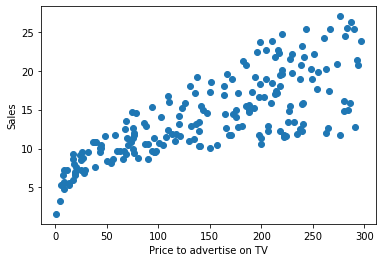

In [ ]:
plt.scatter(x=adv_df['TV'],y=adv_df['Sales'])
plt.xlabel('Price to advertise on TV')
plt.ylabel('Sales')

1 B)

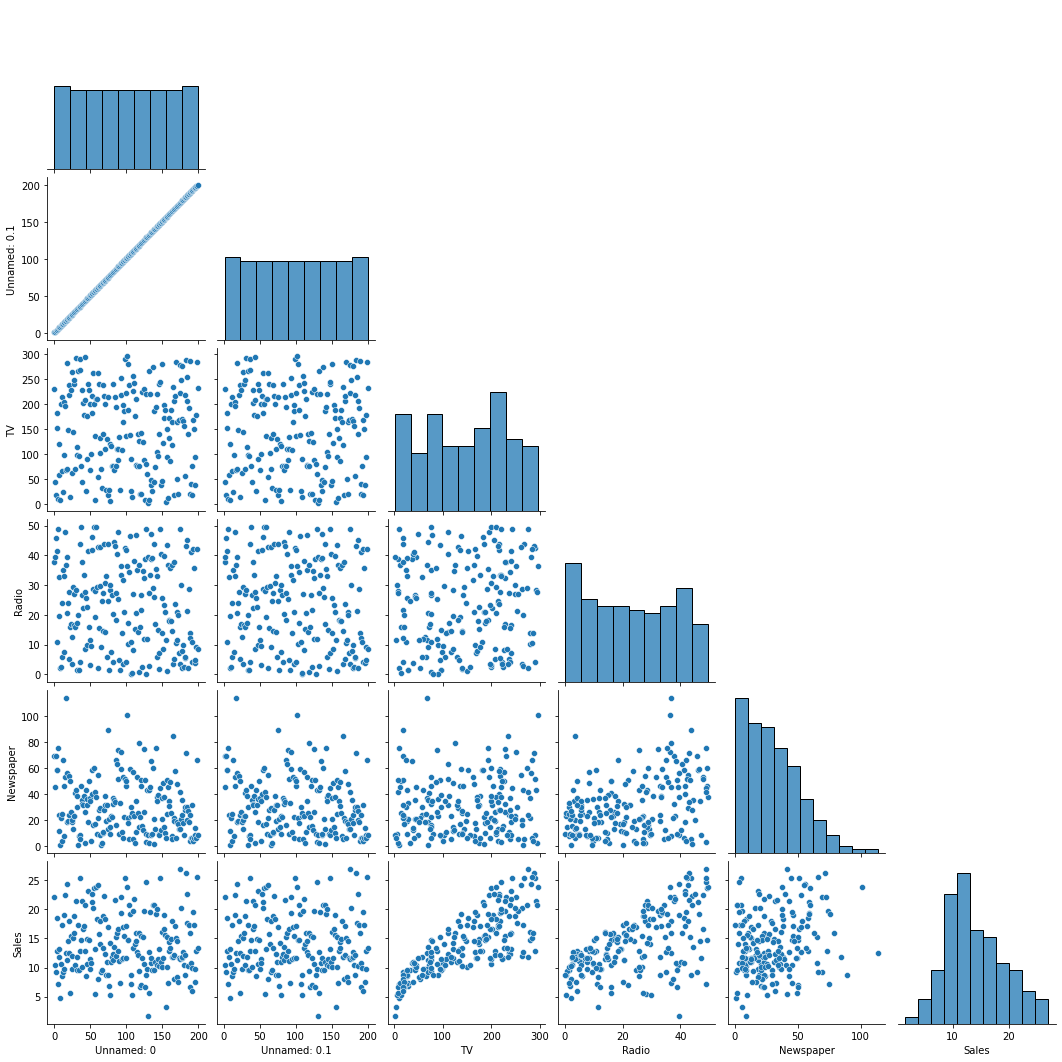

In [ ]:
sns.pairplot(data=adv_df,corner=True)

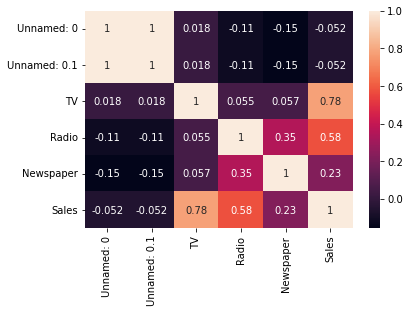

In [ ]:
adv_corr=adv_df.corr()
sns.heatmap(adv_corr,annot=True)

2)

In [ ]:
X=adv_df['TV']
y=adv_df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train,X_test=X_train.values,X_test.values
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)


In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

3) AND 4)

slope: 
 [0.04704165] intercept: 
 7.177057802578858


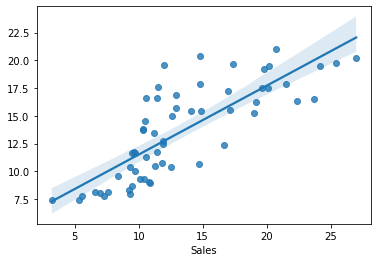

In [ ]:
print("slope: \n", lm.coef_,"intercept: \n",lm.intercept_)
predictions = lm.predict(X_test)
sns.regplot(x=y_test,y=predictions)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.5480925983786147
MSE: 10.318455423013349
RMSE: 3.212235268938648


In [ ]:
pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

x = adv_df['TV'].tolist()
y = adv_df['Sales'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        10:39:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

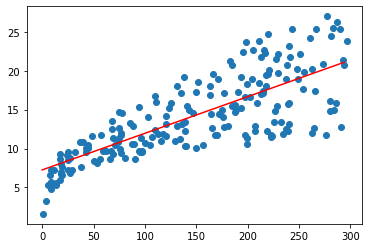

In [ ]:
plt.scatter(adv_df['TV'], adv_df['Sales'])

max_x = adv_df['TV'].max()
min_x = adv_df['Sales'].min()

x = np.arange(min_x, max_x, 1)

y = 0.04704165 * x + 7.177057802578858 
plt.plot(y, 'r')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


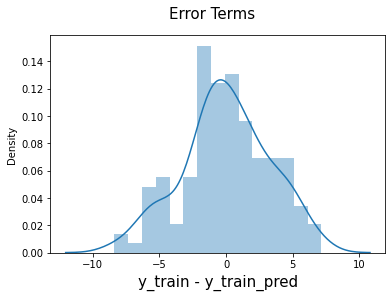

In [ ]:
y_train_pred = lm.predict(X_train)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

In [ ]:
np.mean(y_train-y_train_pred)

-2.3853934700517647e-15

## **Q2 pima-indians-diabetes DATASET**

1)

In [ ]:
pid_df=pd.read_csv('/content/pima-indians-diabetes.csv')

In [ ]:
pid_df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pid_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


2)

In [ ]:
x = pid_df.drop(columns=['1'],axis=0).values
from sklearn import preprocessing
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 ... 0.41877794 0.03800171 0.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]

After Standardisation : 
 [[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]


In [ ]:
X=x_after_Standardisation
y=pid_df['1']

1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

3)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Training accuracy",knn.score(X_train, y_train))
print("Test accuracy",knn.score(X_test, y_test))

Training error 0.8254486133768353
Test error 0.7207792207792207


4)

Text(69.0, 0.5, 'Truth')

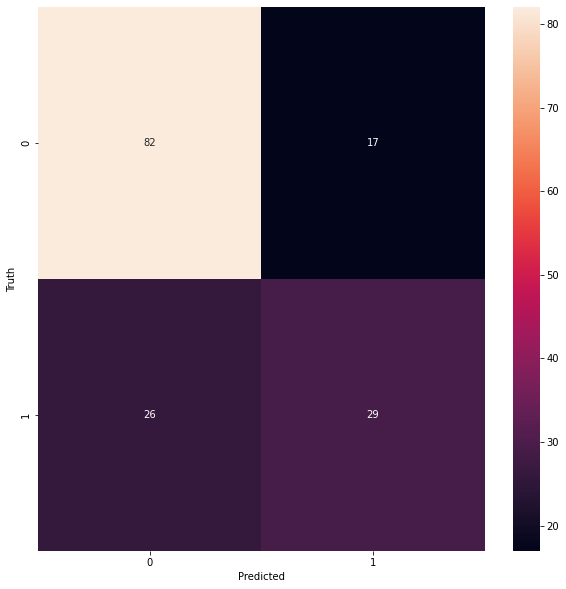

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



5)

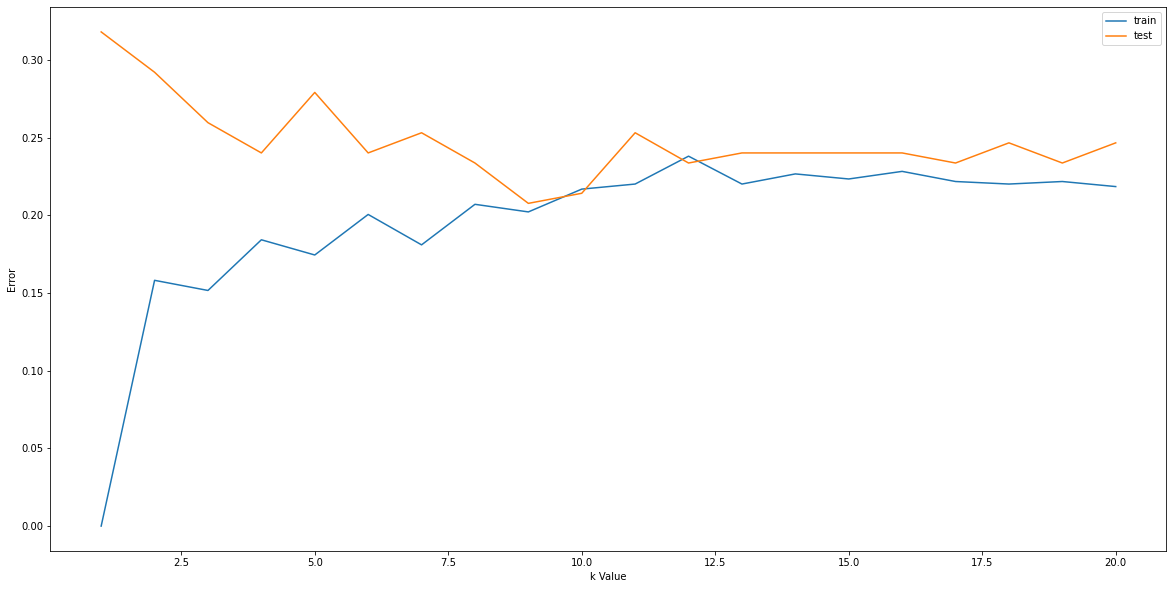

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error1= []
error2= []
for k in range(1,21):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=(20,10))
plt.plot(range(1,21),error1,label="train")
plt.plot(range(1,21),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

## **OPTIMUM VALUE OF K: infering from the above grapf it can be 8**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
print("Training accuracy",knn.score(X_train, y_train))
print("Test accuracy",knn.score(X_test, y_test))

Training accuracy 0.7928221859706363
Test accuracy 0.7662337662337663


Test accuracy 0.7207792207792207 ( with default neighbors)
Test accuracy 0.7662337662337663 ( with optimal neighbors i.e 8 )


In [ ]:
abs(0.7207792207792207-0.7662337662337663)


0.045454545454545525

As we can see there is a significant difference between the test accuracy with default neighbors and taking the optimal neighbors i.e 8